# Understanding CIFAR Data



Now that you understand how two different kinds of networks work for the MNIST dataset, you are going to prepare data for a more general image recognition problem. A lot of the same principles of neural networks apply, but this network is going to be a lot more complicated and robust.

For a more general image recognition challenge, you will need a more general dataset. Luckily, there is a dataset called CIFAR that has labeled images for ten different things. Just like the MNIST data, you are going to prepare it to be fed into a network.

In this dataset there are 50000 training images and 10000 test images. Each image is 32 x 32 pixels. There are 10 possible output classes. Since these pictures are in color, there are three color channels, one for red, green, and blue.

## Preparing the Data


This process is very similar to that of the MNIST dataset. See if you can remember what code to add for each step, and click the accordion if you need help. 

1. Run this cell to import the helper functions and needed libraries.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Helper functions
def show_min_max(array, i):
  random_image = array[i]
  print("min and max value in image: ", random_image.min(), random_image.max())


def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(str(label_names[labels[i]]))
  plt.xticks([])
  plt.yticks([])
  plt.show()


2. Add some variables to keep track of image size.  


<details><summary> Click for final code</summary>

```
img_rows = 32
img_cols = 32  

```
   </details>

In [2]:
img_rows = 32
img_cols = 32

3. Add a variable to keep track of the number of output classes. 


<details><summary> Click for final code</summary>

```
num_classes = 10 

```
   </details>

In [3]:
num_classes=10

4. Add a variable to keep track of the input shape. 


<details><summary> Click for final code</summary>

```
input_shape = (img_rows, img_cols, 3)
```
   </details>

In [4]:
input_shape = (img_rows,img_cols,3)

5. Load the data into your program. 


<details><summary> Click for final code</summary>

```
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data() 
```
   </details>

In [5]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data() 

6. Load a backup copy of the data.  


<details><summary> Click for final code</summary>

```
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = cifar10.load_data() 
```
   </details>

In [6]:
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = cifar10.load_data() 

7. Add the code to set up an array for labels. You can look up the information [here](https://www.cs.toronto.edu/~kriz/cifar.html), or use the dropdown menu.


<details><summary> Click for final code</summary>

```
 label_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 
```
   </details>

In [7]:
 label_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

8. Add this code to convert the label arrays.

```
 train_labels_backup = [item for sublist in train_labels_backup for item in sublist] 
 test_labels_backup = [item for sublist in test_labels_backup for item in sublist] 

```

In [8]:
train_labels_backup = [item for sublist in train_labels_backup for item in sublist] 
test_labels_backup = [item for sublist in test_labels_backup for item in sublist] 

9. Print the shape of the test and train images to make sure you have the correct data. 



<details><summary> Click for final code</summary>

```
print(train_images.shape) 
print(test_images.shape) 
```
</details>

In [9]:
print(test_images.shape,train_images.shape)

(10000, 32, 32, 3) (50000, 32, 32, 3)


10. Use the helper functions to print out the 100th image to ensure the data has loaded correctly.



<details><summary> Click for final code</summary>

```
plot_image(train_images, 100, train_labels_backup)
```
</details>

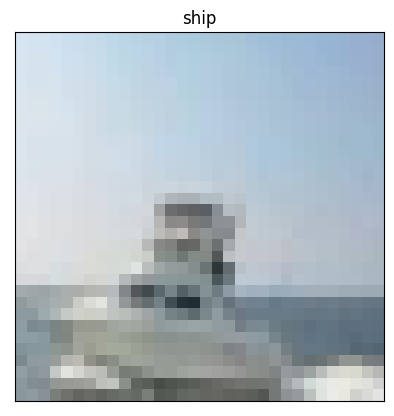

In [10]:
plot_image(train_images, 100, train_labels_backup)

11. Show the min and max values of the 100th image before you normalize the data.



<details><summary> Click for final code</summary>

```
show_min_max(train_images, 100)
```
</details>

In [11]:
show_min_max(train_images,100)

min and max value in image:  30 242


12. Convert the images to the float32 data type.


<details><summary> Click for final code</summary>

```
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
```
</details>

In [12]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

13. Normalize the data into values between 0 and 1.


<details><summary> Click for final code</summary>

```
plot_image(train_images, 100, train_labels_backup)
show_min_max(train_images, 100)
```
</details>

In [13]:
train_images /= 255
test_images /= 255

14. Show the 100th image, and min and max values again to ensure that data preparation has worked correctly.


<details><summary> Click for final code</summary>

```
train_images /= 255
test_images /= 255
```
</details>

15. Convert the labels using one-hot encoding. 


<details><summary> Click for final code</summary>

```
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)
```
</details>

In [14]:
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

# Building a Network for CIFAR

Now that you have your data prepared it is ready to feed into a network. Since this data is so complicated, it makes sense to use another convolutional network. This kind of network will be slightly less computationally needy and will be able to draw conclusions about the data.  

Since you already understand most of the concepts for a convolutional network, this network will allow you to see how those apply to a larger, more general dataset. This network is going to be much more robust and therefore take more time and computing power to train. 

1. Run the cell below to import the needed libraries

In [15]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization 

2. Decide on the number of epochs, batch size, and set the model type. Just like before, you can adjust these as you test your network.

<details><summary> Click for final code</summary>

```
epochs = 15 
batch_size = 64
model = Sequential() 
```
</details>

In [16]:
epochs = 20
batch_size = 32
model =  Sequential()

### Adding Convolutional Layers

Now that the model is set up, it's time to start adding layers to your network. The last convolutional network you made had one round of convolutional layers followed by a pooling layer, and then some layers to wrap up the network and output a decision.

This network is going to need more rounds of layers to figure out information about the pictures. As the layers at first start to decipher what is in the image, the network will start to understand what parts of the image it needs to focus on to understand what it is. This is what makes convolutional neural networks so effective for image recognition. 

Follow these steps to start to build out the layers of this network. 

1. To start add a convolutional layer with 32, 3x3 pixel filters.
2. Add another one, this time with 64, 3x3 pixel filters. 
3. Add a pooling layer with a pool size of 2x2 to condense the information the network has learned so far.
4. Add a dropout layer with a rate of 0.2 so the network doesn't get too dependent on any specific neurons.

<details><summary> Click for final code</summary>

```
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))
```
</details>

In [17]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

### Batch Normalization 

Batch normalization is a process that helps standardize the data in between layers. In a more complicated neural network, as each layer reshapes the data it can quickly become extremely complicated, and the network can lose sight of what the goal is. Batch normalization helps to keep each layer on the right track and working towards the desired goal. 

1. Add a `BatchNormalization()` layer to your model. 

<details><summary> Click for final code</summary>

```
 model.add(BatchNormalization()) 
```
</details>


In [18]:
model.add(BatchNormalization())

That rounds off the first stage of this network. You have added convolutional layers with filters to help learn about the image, a pooling layer to condense and organize the information that the network has learned, a dropout layer to prevent overfitting, and a batch normalization layer to help keep all the data normalized. Now it's time to add another set of layers.

### Adding More Layers

Because this data is so complicated, you are going to add two more rounds of convolutional layers, pooling layers, dropout layers, and batch normalization. This will help the network to do what it needs to do.


1. Add a convolutional layer with: 
    * filters: 64
    * kernel size: (3, 3)
    * activation: relu
2. Add a max pooling layer with 
    * pool size: (1, 1)
3. Add a dropout layer
    * rate: 0.3
4. Add a batch normalization layer

<details><summary> Click for final code</summary>

```
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(rate=0.3)) 
model.add(BatchNormalization())
```
</details>



In [19]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(rate=0.3)) 
model.add(BatchNormalization())

### The Final Stage of Layers

Add another set of layers. This one will need two layers with a lot of filters to help extract more information from the image.

Below the previous layers, follow the steps to add the last set of layers. 

1. Add a convolutional layer with: 
    * filters: 128
    * kernel size: (3, 3)
    * activation: relu
2. Add another convolutional layer with: 
    * filters: 64
    * kernel size: (3, 3)
    * activation: relu
3. Add a max pooling layer with a smaller pool size:
    * pool size: (1, 1)
4. Add a dropout layer with:
    * rate: 0.3
5. Add a batch normalization layer.


<details><summary> Click for final code</summary>

```
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(rate=0.3)) 
model.add(BatchNormalization())
```
</details>


In [20]:
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(rate=0.3)) 
model.add(BatchNormalization())

### The Output Layers

Now it's time to prepare the data for the output. You will need to add some layers to organize the information that the network has and reshape it into the decision layer.

1. Add a flatten layer to start to prepare the network to produce output.
2. Add a Dense layer. 
    * units: 128
    * activation: relu
3. And another Dense layer for the output.
    * units: num_classes
    * activation: softmax

<details><summary> Click for final code</summary>

```
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes,activation='softmax'))
```
</details>

In [21]:
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes,activation='softmax'))

4. Run the next cell to print a summary.

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        3

## Compiling and Training the Model

Now that you have the network, you can compile and train it. Just like with all the other networks, you can use Keras's built-in functions to do this. First, you will compile the model and decide on a loss function, optimizer, and metrics. Then, you will use the fit function to train the model using the data. Finally, evaluate the model using the evaluate function. 

1. First, compile the network. 
    * loss: keras.losses.categorical_crossentropy
    * optimizer: 'adam'
    * metrics: ['accuracy']
    
2. Call the fit function to start the training. 
3. Save the scores. 
4. Print the accuracy. 

<details><summary> Click for final code</summary>

```
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy']) 
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images, test_labels), shuffle=True) 
scores = model.evaluate(test_images, test_labels,verbose=0) 
print('Test accuracy:', scores[1]) 
```
</details>

In [23]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy']) 
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images, test_labels), shuffle=True) 
scores = model.evaluate(test_images, test_labels,verbose=0) 
print('Test accuracy:', scores[1]) 

Epoch 1/20
1563/1563 [==============================] - 112s 71ms/step - loss: 1.5044 - accuracy: 0.4675 - val_loss: 1.2061 - val_accuracy: 0.5642
Epoch 2/20
1563/1563 [==============================] - 111s 71ms/step - loss: 1.0541 - accuracy: 0.6259 - val_loss: 0.9905 - val_accuracy: 0.6368
Epoch 3/20
1563/1563 [==============================] - 114s 73ms/step - loss: 0.8877 - accuracy: 0.6872 - val_loss: 0.9580 - val_accuracy: 0.6682
Epoch 4/20
1563/1563 [==============================] - 114s 73ms/step - loss: 0.7882 - accuracy: 0.7226 - val_loss: 0.7970 - val_accuracy: 0.7176
Epoch 5/20
1563/1563 [==============================] - 118s 75ms/step - loss: 0.7230 - accuracy: 0.7444 - val_loss: 0.8182 - val_accuracy: 0.7205
Epoch 6/20
1563/1563 [==============================] - 121s 77ms/step - loss: 0.6648 - accuracy: 0.7656 - val_loss: 0.7582 - val_accuracy: 0.7396
Epoch 7/20
1563/1563 [==============================] - 124s 79ms/step - loss: 0.6241 - accuracy: 0.7797 - val_loss: 0

5. Optionally save the model by running the next cell. 

In [24]:
model.save('cifar_model.h5')